## Task 1: Read the training data and validation data

In [2]:
import pandas as pd

In [8]:
#loading data
df_train = pd.read_csv('train.txt', names=['Text', 'Emotion'], sep=';')
df_val = pd.read_csv('val.txt', names=['Text', 'Emotion'], sep=';')

In [9]:
print('shape is:', df_train.shape)
df_train.head()

shape is: (16000, 2)


,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [10]:
print('shape is:', df_val.shape)
df_val.head()

shape is: (2000, 2)


,Text,Emotion
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


## Task 2: Merge these labels into two classes, i.e. Positive and Negative sentiment

In [11]:
#set of labels
set(df_train.Emotion)

{'anger', 'fear', 'joy', 'love', 'sadness', 'surprise'}

In [12]:
#replace positive with 1, negative 0
df_train['Emotion'].replace({'joy':1, 'love': 1, 'surprise':1, 'sadness':0, 'anger':0, 'fear':0}, inplace=True)
df_val['Emotion'].replace({'joy':1, 'love': 1, 'surprise':1, 'sadness':0, 'anger':0, 'fear':0}, inplace=True)
df_train

,Text,Emotion
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,1
4,i am feeling grouchy,0
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,0


In [13]:
df_train.Emotion.value_counts()

0    8762
1    7238
Name: Emotion, dtype: int64

## Task 3: Make Data Pre-processing

In [14]:
# Check null values
print(df_train.isnull().sum(), '\n')
print(df_val.isnull().sum())

Text       0
Emotion    0
dtype: int64 

Text       0
Emotion    0
dtype: int64


In [15]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

def make_pre_processing(df_train):
    #rewrite in lowercase
    df_train['Text'] = df_train['Text'].apply(lambda x: x.lower())
    
    #get rid of any characters apart from alphabets
    pattern = r"[^a-z ]"
    df_train['Text'] = df_train['Text'].apply(lambda x: ' '.join( nltk.word_tokenize(re.sub(pattern, " ", x).strip()) ))
    
    #remove stop words
    stop_words = stopwords.words('english')
    df_train['Text'] = df_train['Text'].apply(lambda x: ' '.join([word for word in nltk.word_tokenize(x) if word not in (stop_words)]))
    
    #text lemmatization
    lemmatizer = WordNetLemmatizer()
    df_train['Text'] = df_train['Text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(i, wordnet.VERB) for i in nltk.word_tokenize(x)]))
    
    #drop duplicate values (keep first)
    df_train.drop_duplicates(keep="first", inplace = True)
    
    return df_train

In [16]:
df_train = make_pre_processing(df_train)
df_val = make_pre_processing(df_val)

## Task 4: Visualize using Word Cloud

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

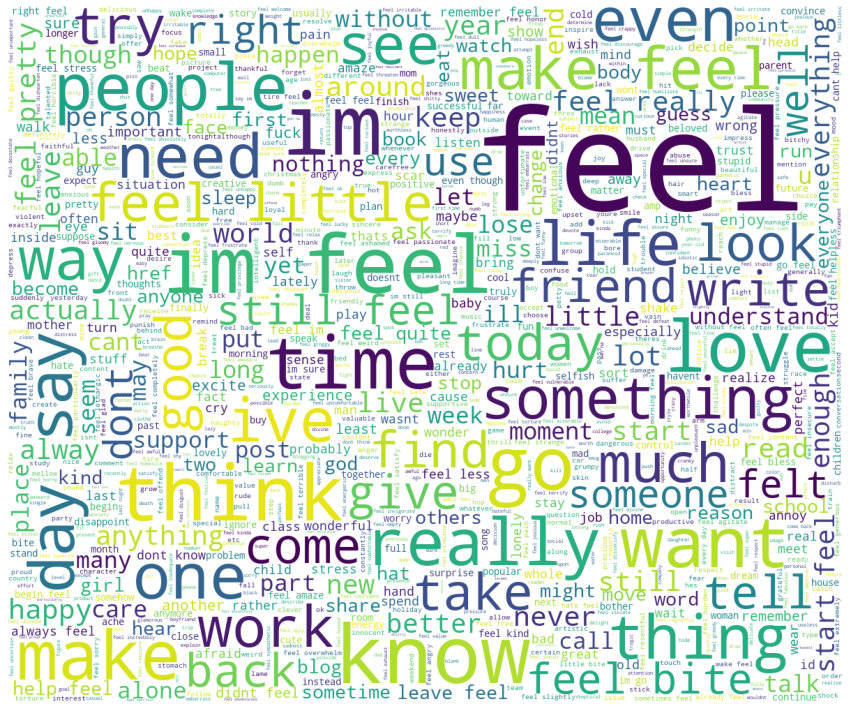

In [12]:
text = " ".join(x for x in df_train.Text)

#write 'collocations = False' to the WordCloud function if we need to separate words that are written with two words
wordcloud = WordCloud(max_font_size=200, max_words=1000, background_color="white", width=1200, height=1000).generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Task 5: Create Bag of Words

In [18]:
import numpy as np
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
bag_of_words = [nltk.word_tokenize(i) for i in df_train.Text]
bag_of_words = list(np.concatenate(bag_of_words))

bag_count = Counter(bag_of_words)
bag_count.most_common()

[('feel', 16824),
 ('like', 2994),
 ('im', 2418),
 ('get', 1288),
 ('make', 1227),
 ('go', 1100),
 ('know', 1041),
 ('time', 978),
 ('really', 942),
 ('think', 919),
 ('want', 867),
 ('little', 733),
 ('love', 727),
 ('people', 664),
 ('would', 645),
 ('say', 623),
 ('even', 598),
 ('one', 596),
 ('still', 591),
 ('ive', 584),
 ('life', 550),
 ('bite', 524),
 ('need', 521),
 ('something', 513),
 ('much', 495),
 ('dont', 482),
 ('things', 480),
 ('way', 470),
 ('work', 469),
 ('see', 459),
 ('could', 453),
 ('start', 445),
 ('come', 438),
 ('day', 427),
 ('look', 422),
 ('take', 415),
 ('back', 414),
 ('try', 410),
 ('good', 393),
 ('pretty', 391),
 ('leave', 378),
 ('find', 355),
 ('always', 355),
 ('right', 353),
 ('also', 336),
 ('help', 335),
 ('today', 327),
 ('write', 320),
 ('give', 316),
 ('around', 312),
 ('cant', 299),
 ('tell', 296),
 ('well', 278),
 ('though', 273),
 ('didnt', 272),
 ('felt', 265),
 ('lot', 264),
 ('use', 264),
 ('never', 263),
 ('every', 254),
 ('someone', 

Text(0, 0.5, 'count')

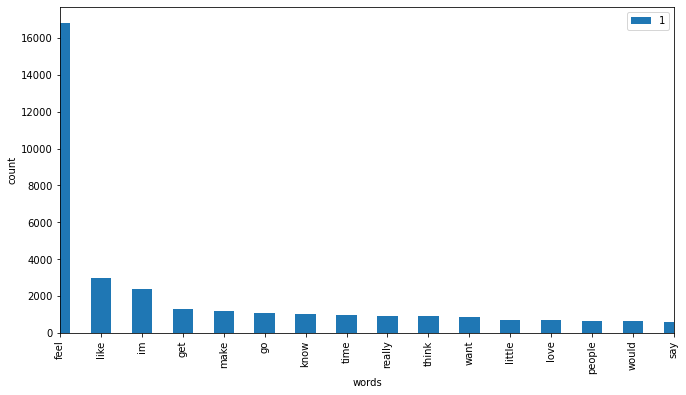

In [25]:
counter_df = pd.DataFrame(Counter(bag_of_words).most_common()).set_index(0)

counter_df.plot(kind='bar', figsize=(11,6))
plt.xlim(0, 15)
plt.xlabel('words')
plt.ylabel('count')

In [29]:
TfIdf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2))

bag_cv = TfIdf.fit_transform(df_train.Text)

feature_names = TfIdf.get_feature_names()
df_cv = pd.DataFrame(bag_cv.toarray(), columns = feature_names, dtype='i1')

In [30]:
df_cv

,aa,aa full,aa meet,aaaaaaand,aaaaand,aaaaand tis,aaaand,aaaand steal,aac,aac feel,...,zucchini,zucchini allow,zum,zum eintrag,zumba,zumba class,zumba half,zumba lame,zz,zz top
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15858,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Task 6: Train Algorithms

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [32]:
#train test data
X_train = TfIdf.fit_transform(df_train.Text)
X_test = TfIdf.transform(df_val.Text)
y_train = df_train.Emotion
y_test = df_val.Emotion

In [33]:
svc = SVC()
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression(solver='lbfgs', max_iter=3000)

In [34]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc}

In [20]:
pred_scores = []
for k,v in clfs.items():
    v.fit(X_train, y_train)
    pred = v.predict(X_test)
    pred_scores.append((k, accuracy_score(y_test,pred)))

In [21]:
df_score = pd.DataFrame(pred_scores, columns=['index','Score'])
df_score

,index,Score
0,SVC,0.950376
1,KN,0.855639
2,NB,0.917794
3,DT,0.909273
4,LR,0.943860


## Task 7: Evaluate and visualize results

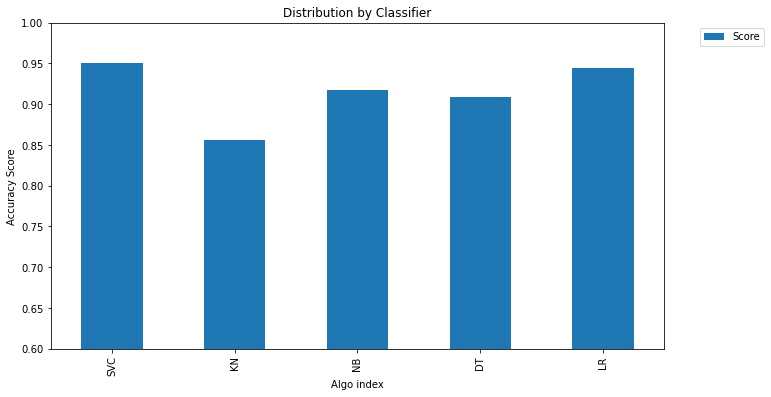

In [22]:
df_score.plot(kind='bar', ylim=(0.6,1.0), figsize=(11,6))
plt.xticks(np.arange(5), df_score['index'])
plt.ylabel('Accuracy Score')
plt.xlabel('Algo index')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

# Combine all in one

In [35]:
from sklearn.ensemble import VotingClassifier

In [36]:
model = VotingClassifier(estimators=[('svc', svc), ('nb', mnb), ('lr', lrc), ('kn', knc), ('dt', dtc)], voting='hard')
model.fit(X_train, y_train)

VotingClassifier(estimators=[('svc', SVC()), ('nb', MultinomialNB()),
                             ('lr', LogisticRegression(max_iter=3000)),
                             ('kn', KNeighborsClassifier()),
                             ('dt', DecisionTreeClassifier())])

In [37]:
pred = model.predict(X_test)
accuracy_score(y_test,pred)

0.9458646616541353

# Confusion_matrix

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
confusion_matrix(y_test, pred)

array([[1004,   31],
       [  77,  883]], dtype=int64)

In [40]:
from sklearn.metrics import plot_confusion_matrix

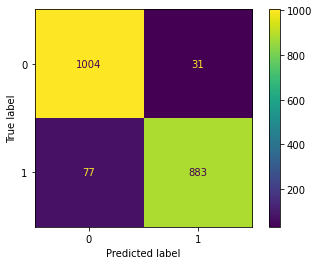

In [52]:
cm = plot_confusion_matrix(model, X_test, y_test)  
plt.show()

# Save all models

In [104]:
import joblib

In [118]:
joblib.dump(model, 'model.sav')

['model.sav']

In [109]:
joblib.dump(TfIdf, 'tfidf.sav')

['tfidf.sav']

# Test model

In [112]:
input_text = "Hello i love you"

In [113]:
df_input = pd.DataFrame([input_text], columns=['Text'])

In [114]:
df_input = make_pre_processing(df_input)

In [115]:
input_test = TfIdf.transform(df_input.Text)
knc.predict(input_test)

array([0], dtype=int64)

In [117]:
input_pred_scores = []
for k,v in clfs.items():
    pred = v.predict(input_test)
    input_pred_scores.append((k, ('Positive' if pred[0] == 1 else 'Negative') ))

df_score = pd.DataFrame(input_pred_scores, columns=['index','Score'])
df_score

,index,Score
0,SVC,Positive
1,KN,Negative
2,NB,Negative
3,DT,Positive
4,LR,Positive


In [116]:
model.predict(input_test)

array([1], dtype=int64)